# Homework03
# 2018-15185 김나경

Step 1 Load csv files as DataFrame

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

#load googleplaystore.csv as DataFrame 'apps'
apps = pd.read_csv("hw3_data/googleplaystore.csv")

#load googleplaystore.csv as DataFrame 'reviews'
reviews = pd.read_csv("hw3_data/googleplaystore_user_reviews.csv")

#print(apps) #to check if the functions above worked properly

Step 2 Delete any review that does not contain either a Translated_Review or a Sentiment

In [2]:
reviews = reviews.dropna(subset=['Translated_Review', 'Sentiment'])

Step 3 Remove any apps with invalid Rating (>5).

In [3]:
apps = apps[(apps['Rating'] <= 5) | (apps['Rating'].isnull())]
print(apps) #to check if the function above worked properly

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

Step 4 Produce a pie chart with the Android Ver requirements for the different apps

<ipython-input-4-8ea84a40f9d4>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(new_apps_android, labels=new_apps_android.index, startangle=90, autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '');


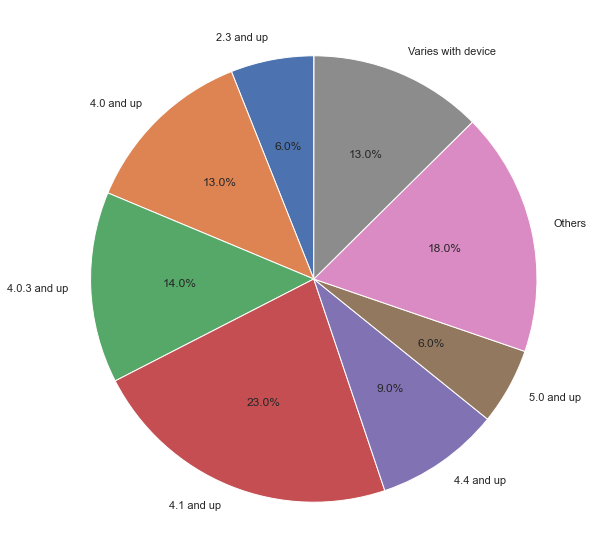

In [4]:
apps_android = pd.DataFrame({'Percentage': apps.groupby(['Android Ver']).size() / len(apps)}) #to see percentage

#indices with less than five percentage
less_than_five = []

#save indices in the list
for i in range(len(apps_android)):
    if apps_android['Percentage'][i] < 0.05:
        less_than_five.append(apps_android.index[i])

for i in range(1, len(apps)-1):
    try:
        if apps.at[i, 'Android Ver'] in less_than_five:
            apps.at[i, 'Android Ver'] = 'Others' #change the android ver value  
    except KeyError: pass #for missing row
  

#for figure
new_apps_android = pd.DataFrame({'Percentage': apps.groupby(['Android Ver']).size() / len(apps)}) 
plt.figure(figsize=(10,10));
plt.axis('equal');
plt.pie(new_apps_android, labels=new_apps_android.index, startangle=90, autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '');
plt.show()

#I first tried to use groupby.plot but changed to use plt
#but remained the original code commented for comparison
#apps.groupby(['Android Ver']).sum().unstack().plot(kind='pie', title='Android Ver', labels = apps['Android Ver'], subplots=True, startangle=90,figsize=(15,15), autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '', fontsize=20)

Step 5 Create a similar pie chart for app Category

<ipython-input-14-a67f6e80513b>:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(new_apps_category, labels=new_apps_category.index, startangle=90, autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '', labeldistance=1.1);


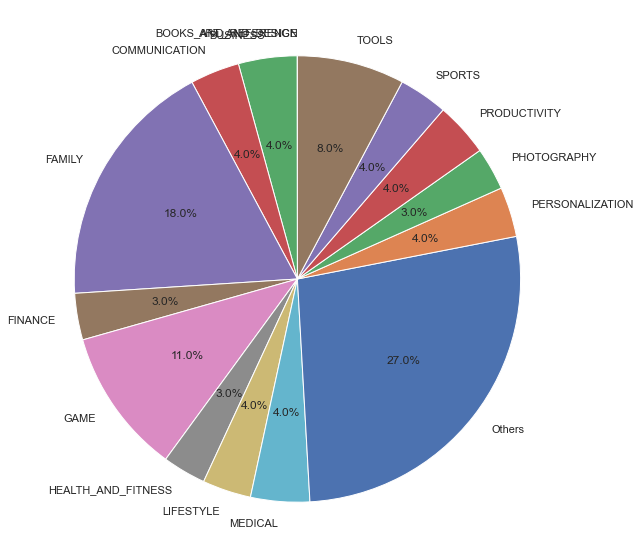

In [14]:
apps_category = pd.DataFrame({'Percentage': apps.groupby(['Category']).size() / len(apps)})

#indices with less than three percentage
less_than_three = []

#save indices in the list
for i in range(len(apps_category)):
    if apps_category['Percentage'][i] < 0.03:
        less_than_three.append(apps_category.index[i])

for i in range(1, len(apps)-1):
    try:
        if apps.at[i, 'Category'] in less_than_three:
            apps.at[i, 'Category'] = 'Others' #change the category value  
    except KeyError: pass #for missing row

#for figure
new_apps_category = pd.DataFrame({'Percentage': apps.groupby(['Category']).size() / len(apps)})
plt.figure(figsize=(10,10));
plt.axis('equal');
plt.pie(new_apps_category, labels=new_apps_category.index, startangle=90, autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '', labeldistance=1.1);
plt.show()
    
#I first tried to use groupby.plot but changed to use plt
#but remained the original code commented for comparison    
#apps.groupby(['Category']).sum().unstack().plot(kind='pie', title='Category', subplots=True, startangle=90, figsize=(30,30), autopct=lambda p:'{:.1f}%'.format(round(p)) if p > 1 else '', fontsize=20)

Step 6 Show histograms of the Rating and Reviews across all apps

Text(0, 0.5, 'the number of apps')

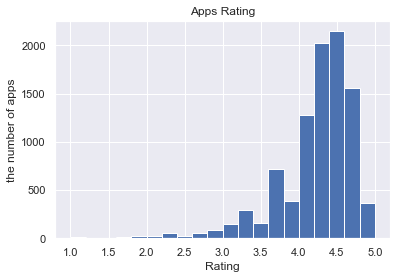

In [6]:
#becuase of the size of data, here comes a RuntimeWarning
#here I decided to ignore the RuntimeWarning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

plt.hist(apps['Rating'], bins = 20)
plt.title('Apps Rating')
plt.xlabel('Rating')
plt.ylabel('the number of apps')

Text(0, 0.5, 'the number of apps')

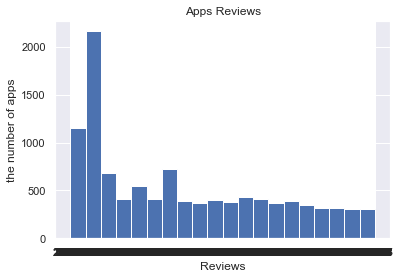

In [7]:
plt.hist(apps['Reviews'], bins = 20)
plt.title('Apps Reviews')
plt.xlabel('Reviews')
plt.ylabel('the number of apps')

Step 7 Plot a bar chart for different Sentiment categories

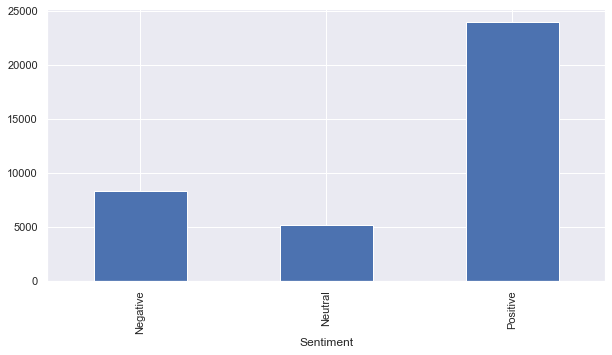

In [8]:
reviews.groupby(['Sentiment']).size().plot(kind='bar', subplots=False, figsize=(10,5))

Step 8 Combine the two DataFrames into a single one, based on the App names

In [9]:
apps_with_reviews = pd.merge(apps, reviews, how='inner', on='App', left_on = None, right_on = None, left_index=False, right_index=False, copy=True, suffixes=('_x', '_y'))
#commented code is to see only one review per an app
#but it was commented in order to see every review
#apps_with_reviews = apps_with_reviews.drop_duplicates(['App'])
print(apps_with_reviews) #to check if pd.merge worked properly

                                App     Category  Rating Reviews  \
0               Coloring book moana       Others     3.9     967   
1               Coloring book moana       Others     3.9     967   
2               Coloring book moana       Others     3.9     967   
3               Coloring book moana       Others     3.9     967   
4               Coloring book moana       Others     3.9     967   
...                             ...          ...     ...     ...   
72600  A+ Gallery - Photos & Videos  PHOTOGRAPHY     4.5  223941   
72601  A+ Gallery - Photos & Videos  PHOTOGRAPHY     4.5  223941   
72602  A+ Gallery - Photos & Videos  PHOTOGRAPHY     4.5  223941   
72603  A+ Gallery - Photos & Videos  PHOTOGRAPHY     4.5  223941   
72604  A+ Gallery - Photos & Videos  PHOTOGRAPHY     4.5  223941   

                     Size     Installs  Type Price Content Rating  \
0                     14M     500,000+  Free     0       Everyone   
1                     14M     500,000+  Free 

Step 9 Group the Sentiment by rounded Rating

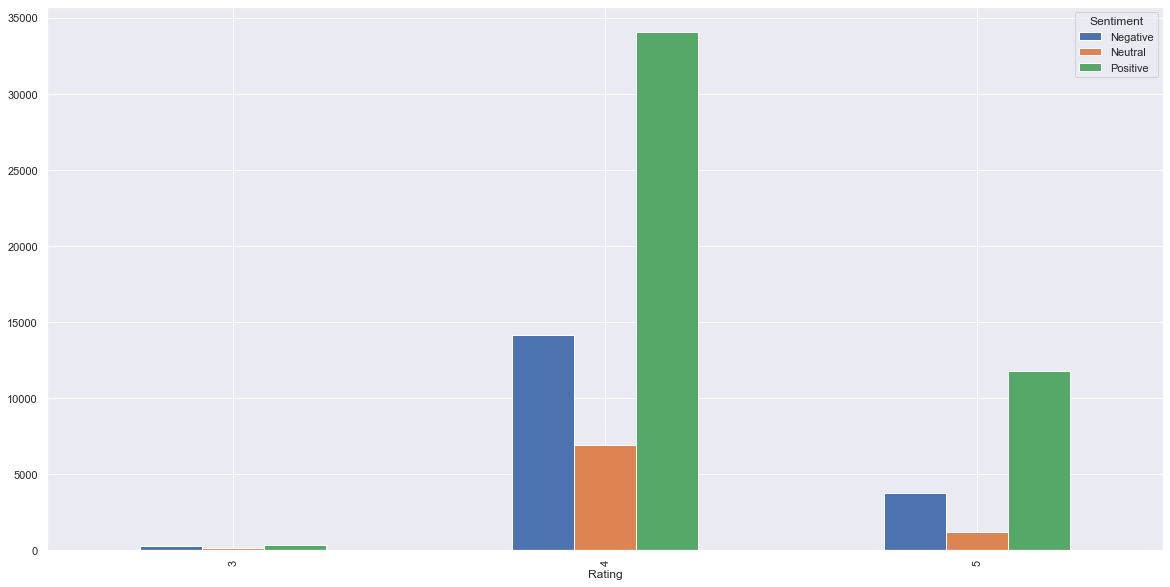

In [10]:
apps_with_reviews = apps_with_reviews.dropna(subset=['Rating'])
apps_with_reviews['Rating'] = apps_with_reviews['Rating'].apply(lambda x: round(x)) #round rating
apps_with_reviews.groupby(['Rating', 'Sentiment']).size().unstack().plot(kind='bar', subplots=False, figsize=(20,10))

Further explanation is on the word file attached with this code file.